<h3>ANLY 601 Spring 2020 Project: Image Classification Optimization</h3>

<H3>Mengzhi Zhou, Guanzhi Wang</H3>

#### Imported Package 

In [1]:
#library package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing import image
from zipfile import ZipFile 
import datetime
import time
import matplotlib.image as img


#deep learning model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_auc_score



c:\users\user\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\user\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\user\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\user\anaconda3\envs\tensorflow\lib\site-packages\ten

### EDA

Dataset: Dog vs. Cat

In [2]:
#load data
#dataset directory
test="dataset/test_set"
train="dataset/training_set"

#cat vs. dog
train_cats=train + '/cats'
train_dogs=train + '/dogs'
test_cats=test + '/cats'
test_dogs=test + '/dogs'

In [3]:
#basic info for dataset
print('cat (training):',len(os.listdir(train_cats)))
print('cat (testing):',len(os.listdir(test_cats)))
print('dog (training):',len(os.listdir(train_dogs)))
print('dog (testing):',len(os.listdir(test_dogs)))

cat (training): 7000
cat (testing): 3000
dog (training): 7000
dog (testing): 3000


In [4]:
#image information:cat
images_cat = []
for i in range(10):
  im = img.imread(train_cats+'/cat.{}.jpg'.format(i))
  images_cat.append(im)
  print('Cat image shape', im.shape, 'maximum color level', im.max())

Cat image shape (374, 500, 3) maximum color level 255
Cat image shape (280, 300, 3) maximum color level 248
Cat image shape (396, 312, 3) maximum color level 255
Cat image shape (414, 500, 3) maximum color level 255
Cat image shape (375, 499, 3) maximum color level 255
Cat image shape (144, 175, 3) maximum color level 255
Cat image shape (303, 400, 3) maximum color level 255
Cat image shape (499, 495, 3) maximum color level 255
Cat image shape (345, 461, 3) maximum color level 255
Cat image shape (425, 320, 3) maximum color level 247


In [5]:
#image information:dog
images_dog = []
for i in range(10):
  im = img.imread(train_dogs+'/dog.{}.jpg'.format(i))
  images_dog.append(im)
  print('Dog image shape', im.shape, 'maximum color level', im.max())

Dog image shape (375, 499, 3) maximum color level 255
Dog image shape (499, 327, 3) maximum color level 255
Dog image shape (199, 187, 3) maximum color level 255
Dog image shape (375, 499, 3) maximum color level 255
Dog image shape (287, 300, 3) maximum color level 255
Dog image shape (376, 499, 3) maximum color level 255
Dog image shape (488, 499, 3) maximum color level 255
Dog image shape (264, 299, 3) maximum color level 255
Dog image shape (500, 469, 3) maximum color level 255
Dog image shape (500, 368, 3) maximum color level 255


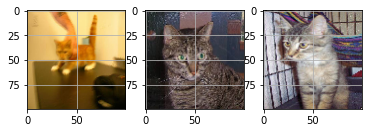

In [6]:
#image sample for cat
plt.subplot(1,3,1)
imagesample_cat=image.load_img(train + '/cats/cat.0.jpg', target_size = (100, 100)) 
plt.imshow(imagesample_cat)
plt.grid(None) 
plt.subplot(1,3,2)
imagesample_cat=image.load_img(train + '/cats/cat.1.jpg', target_size = (100, 100)) 
plt.imshow(imagesample_cat)
plt.grid(None) 
plt.subplot(1,3,3)
imagesample_cat=image.load_img(train + '/cats/cat.2.jpg', target_size = (100, 100)) 
plt.imshow(imagesample_cat)
plt.grid(None) 
plt.show()

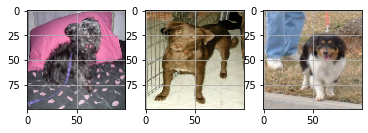

In [7]:
#image sample for dog
plt.subplot(1,3,1)
imagesample_dog=image.load_img(train + '/dogs/dog.0.jpg', target_size = (100, 100)) 
plt.imshow(imagesample_dog)
plt.grid(None) 
plt.subplot(1,3,2)
imagesample_dog=image.load_img(train + '/dogs/dog.1.jpg', target_size = (100, 100)) 
plt.imshow(imagesample_dog)
plt.grid(None) 
plt.subplot(1,3,3)
imagesample_dog=image.load_img(train + '/dogs/dog.2.jpg', target_size = (100, 100)) 
plt.imshow(imagesample_dog)
plt.grid(None) 
plt.show()

In [8]:
#transfer image to digit
#data_generator=ImageDataGenerator(rescale=1/255,zoom_range=0.2)
data_generator=ImageDataGenerator(rescale=1/255)

batch_size=32

training=data_generator.flow_from_directory(directory=train,
                                                   target_size=(64, 64),
                                                   batch_size=batch_size,
                                                   color_mode='rgb',
                                                   class_mode='binary')
testing=data_generator.flow_from_directory(directory=test,
                                                  target_size=(64, 64),
                                                  batch_size=batch_size,
                                                  color_mode='rgb',
                                                  class_mode='binary',
                                                  shuffle=False)

Found 14000 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.


### Building Model

#### Baseline Model

In [9]:
#CNN model for image classification -- 1 layer
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = training.image_shape))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.3))

#flattening
model.add(Flatten())

#full connection
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(rate = 0.1))
model.add(Dense(units = 2, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 30752)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1968192   
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total para

In [11]:
#time count:starttime
start = datetime.datetime.now()

#fit model with training data
fit1 = model.fit_generator(training,
                        steps_per_epoch = 1000,
                        epochs = 50,
                        validation_data = testing,
                        validation_steps = 1000)

#time count:endtime
end= datetime.datetime.now()
elapsed= end-start
#print ('running time:', elapsed)


Epoch 1/50
438/438 [==============================] - 18s 41ms/step - loss: 0.6267 - acc: 0.6543 - val_loss: 0.5748 - val_acc: 0.6985
Epoch 2/50
438/438 [==============================] - 17s 38ms/step - loss: 0.5128 - acc: 0.7451 - val_loss: 0.5491 - val_acc: 0.7173
Epoch 3/50
438/438 [==============================] - 17s 38ms/step - loss: 0.4549 - acc: 0.7831 - val_loss: 0.5185 - val_acc: 0.7467
Epoch 4/50
438/438 [==============================] - 17s 38ms/step - loss: 0.3957 - acc: 0.8180 - val_loss: 0.5404 - val_acc: 0.7410
Epoch 5/50
438/438 [==============================] - 17s 38ms/step - loss: 0.3491 - acc: 0.8438 - val_loss: 0.5125 - val_acc: 0.7565
Epoch 6/50
438/438 [==============================] - 16s 37ms/step - loss: 0.2892 - acc: 0.8785 - val_loss: 0.5466 - val_acc: 0.7560
Epoch 7/50
438/438 [==============================] - 16s 37ms/step - loss: 0.2358 - acc: 0.9004 - val_loss: 0.6276 - val_acc: 0.7472
Epoch 8/50
438/438 [==============================] - 17s 38ms

438/438 [==============================] - 17s 38ms/step - loss: 0.0364 - acc: 0.9876 - val_loss: 1.3285 - val_acc: 0.7337
Epoch 39/50
438/438 [==============================] - 17s 38ms/step - loss: 0.0310 - acc: 0.9893 - val_loss: 1.3630 - val_acc: 0.7353
Epoch 40/50
438/438 [==============================] - 17s 38ms/step - loss: 0.0240 - acc: 0.9931 - val_loss: 1.5515 - val_acc: 0.7325
Epoch 41/50
438/438 [==============================] - 17s 38ms/step - loss: 0.0296 - acc: 0.9897 - val_loss: 1.3701 - val_acc: 0.7297
Epoch 42/50
438/438 [==============================] - 17s 38ms/step - loss: 0.0278 - acc: 0.9916 - val_loss: 1.4623 - val_acc: 0.7297
Epoch 43/50
438/438 [==============================] - 16s 37ms/step - loss: 0.0272 - acc: 0.9916 - val_loss: 1.4864 - val_acc: 0.7352
Epoch 44/50
438/438 [==============================] - 17s 38ms/step - loss: 0.0235 - acc: 0.9923 - val_loss: 1.3853 - val_acc: 0.7363
Epoch 45/50
438/438 [==============================] - 17s 38ms/ste

In [12]:
print ('running time:', elapsed)


running time: 0:13:52.321053


In [13]:
val_loss, val_acc = \
model.evaluate_generator(testing, 
                        steps=3000)

print('val_loss:', val_loss)
print('val_acc:', val_acc)

val_loss: 1.4503563737615626
val_acc: 0.7381667


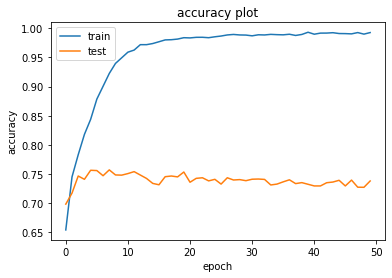

In [14]:
#accuracy plot
plt.title('accuracy plot')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(fit1.history['acc'])
plt.plot(fit1.history['val_acc'])
plt.legend(['train', 'test'], loc='upper left')

plt.show()

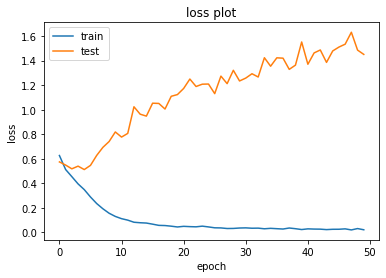

In [15]:
#loss plot
plt.title('loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(fit1.history['loss'])
plt.plot(fit1.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')

plt.show()

In [18]:
#confusion matrix
pred_test = model.predict_generator(testing, steps=1000)
pred = np.argmax(pred_test, axis=1)
print('Confusion Matrix')
print(confusion_matrix(list(testing.classes), list(pred)))

Confusion Matrix
[[2247  753]
 [ 818 2182]]


In [19]:
#classification report
name = testing.classes
labels = list(testing.class_indices.keys())   
report = classification_report(name, pred, target_names=labels)
print(report) 

              precision    recall  f1-score   support

        cats       0.73      0.75      0.74      3000
        dogs       0.74      0.73      0.74      3000

    accuracy                           0.74      6000
   macro avg       0.74      0.74      0.74      6000
weighted avg       0.74      0.74      0.74      6000



In [26]:
#AUC score
print('AUC Score: ',roc_auc_score(testing.classes, pred))

AUC Score:  0.7381666666666666


In [21]:
#model prediction function
def imagepred(imagedir):
    test = image.load_img(imagedir, target_size = (64, 64))
    test = image.img_to_array(test)
    test = np.expand_dims(test, axis = 0)
    result = model.predict(x = test)
    #print(result)
    if result[0][0]  == 1:
        pred_result = 'Prediction result: Dog'
    else:
        pred_result = 'Prediction result: Cat'
    return pred_result

In [22]:
print(imagepred(test + '/dogs/dog.8300.jpg'))

Prediction result: Cat


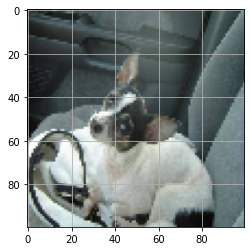

In [23]:
#test sample
imagesample_dog=image.load_img(test + '/dogs/dog.8300.jpg', target_size = (100, 100)) 
plt.imshow(imagesample_dog)
plt.grid(None) 
plt.show()

In [24]:
print(imagepred(test + '/cats/cat.8200.jpg'))

Prediction result: Cat


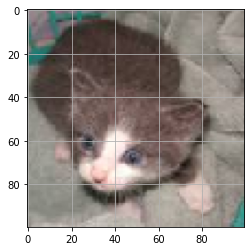

In [25]:
#test sample
imagesample_dog=image.load_img(test + '/cats/cat.8200.jpg', target_size = (100, 100)) 
plt.imshow(imagesample_dog)
plt.grid(None) 
plt.show()